Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/2 [00:00<?, ?it/s]

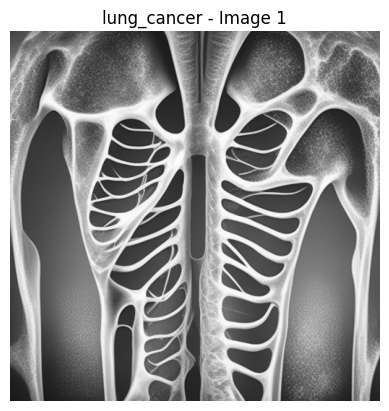

  0%|          | 0/2 [00:00<?, ?it/s]

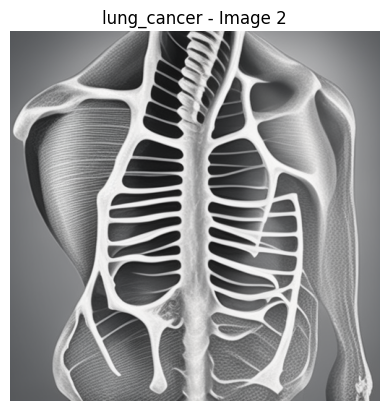

  0%|          | 0/2 [00:00<?, ?it/s]

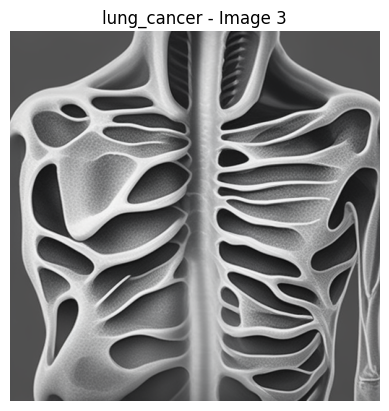

  0%|          | 0/2 [00:00<?, ?it/s]

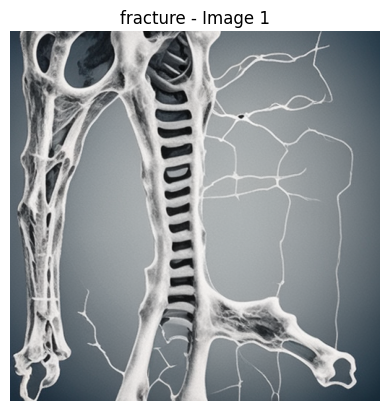

  0%|          | 0/2 [00:00<?, ?it/s]

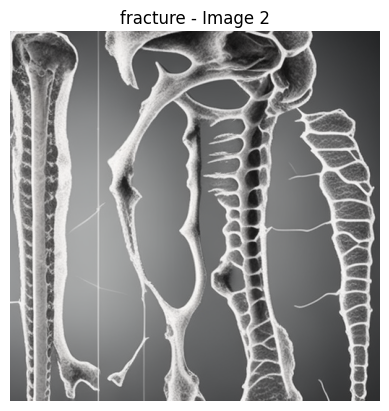

  0%|          | 0/2 [00:00<?, ?it/s]

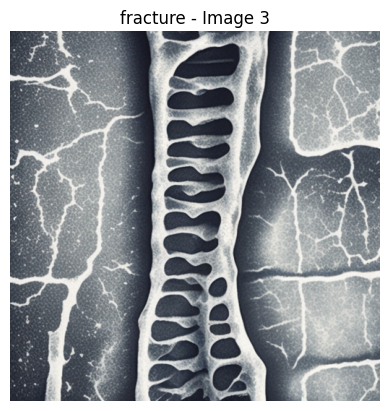

  0%|          | 0/2 [00:00<?, ?it/s]

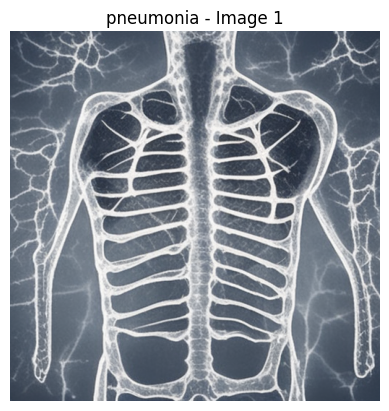

  0%|          | 0/2 [00:00<?, ?it/s]

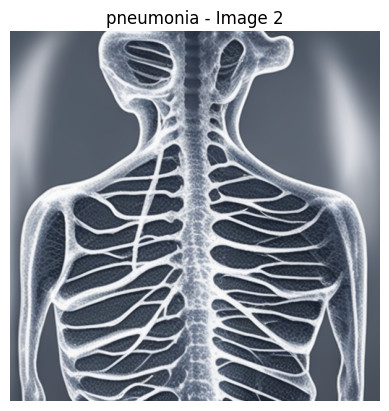

  0%|          | 0/2 [00:00<?, ?it/s]

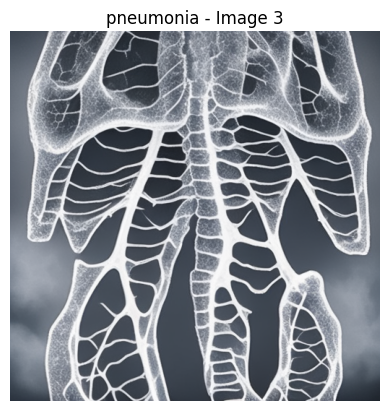

  0%|          | 0/2 [00:00<?, ?it/s]

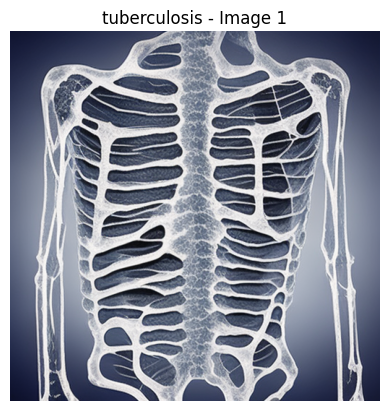

  0%|          | 0/2 [00:00<?, ?it/s]

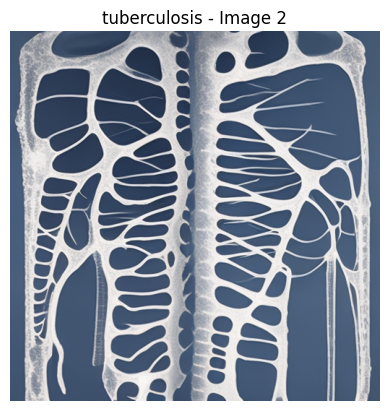

  0%|          | 0/2 [00:00<?, ?it/s]

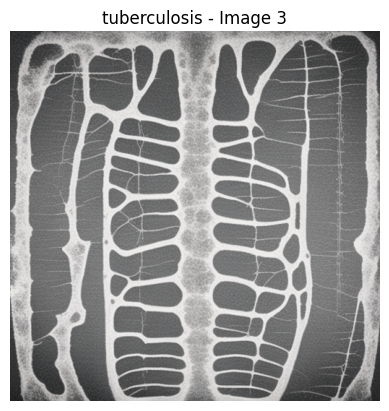

  0%|          | 0/2 [00:00<?, ?it/s]

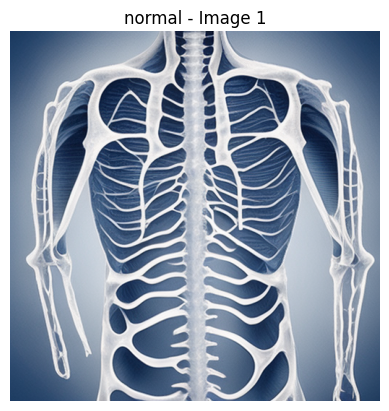

  0%|          | 0/2 [00:00<?, ?it/s]

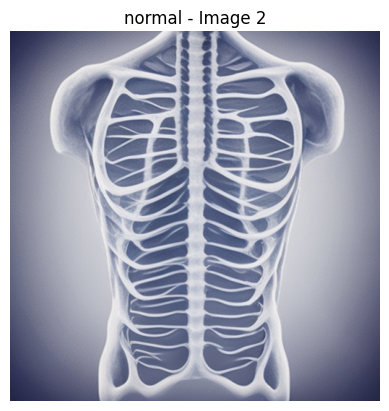

  0%|          | 0/2 [00:00<?, ?it/s]

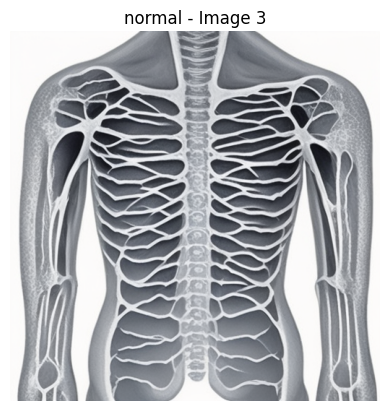

✅ X-RAY DATASET GENERATED SUCCESSFULLY


In [2]:
# ================================
# STEP 1: Install required libraries
# ================================
!pip install diffusers transformers accelerate safetensors pillow matplotlib

# ================================
# STEP 2: Imports
# ================================
from diffusers import AutoPipelineForText2Image
import torch
import os
import matplotlib.pyplot as plt

# ================================
# STEP 3: Load lightweight Stable Diffusion (CPU safe)
# ================================
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sd-turbo",
    torch_dtype=torch.float32
)

pipe = pipe.to("cpu")
pipe.enable_attention_slicing()

# ================================
# STEP 4: Create dataset directory
# ================================
dataset_dir = "xray_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# ================================
# STEP 5: Disease labels (LIST)
# ================================
labels = [
    "lung_cancer",
    "fracture",
    "pneumonia",
    "tuberculosis",
    "normal"
]

# Corresponding X-ray prompts
prompts = {
    "lung_cancer": "realistic chest x-ray showing lung cancer tumor, grayscale medical x-ray",
    "fracture": "x-ray image of fractured human bone, broken arm, orthopedic radiograph",
    "pneumonia": "chest x-ray showing pneumonia infection, cloudy lungs, radiology scan",
    "tuberculosis": "chest x-ray showing tuberculosis, lung lesions, medical radiograph",
    "normal": "normal healthy chest x-ray, clear lungs, medical radiograph"
}

# ================================
# STEP 6: Generate X-ray images
# ================================
IMAGES_PER_LABEL = 3   # can change to 5 if needed

for label in labels:
    label_path = os.path.join(dataset_dir, label)
    os.makedirs(label_path, exist_ok=True)

    for i in range(1, IMAGES_PER_LABEL + 1):
        image = pipe(
            prompts[label],
            num_inference_steps=2,
            guidance_scale=0.0
        ).images[0]

        image_file = f"{label}_{i}.png"
        image.save(os.path.join(label_path, image_file))

        # Display image
        plt.imshow(image, cmap="gray")
        plt.axis("off")
        plt.title(f"{label} - Image {i}")
        plt.show()

print("✅ X-RAY DATASET GENERATED SUCCESSFULLY")


In [3]:
import shutil

shutil.make_archive("xray_dataset", "zip", "xray_dataset")


'/content/xray_dataset.zip'